In [9]:
from pandas_datareader import wb
import pandas_datareader.data as web
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

import altair as alt

%matplotlib inline

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

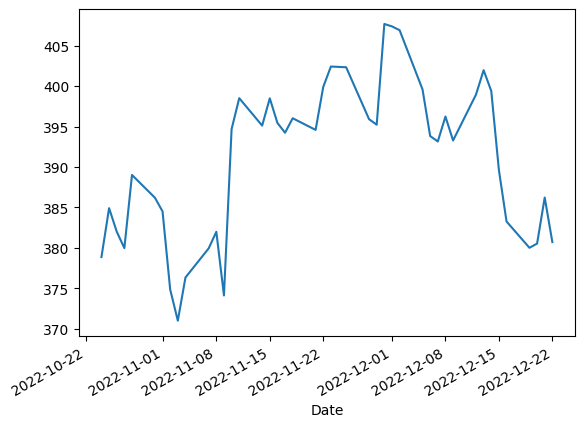

In [10]:
data = web.DataReader('SPY', start='2022-10-24', end='2022-12-23') 
c = data['Close']
c.plot()

In [11]:
# Read Data
test = web.DataReader(['TSLA','FB'], start='2018-01-01', end='2019-12-31')
test.head()

[*********************100%***********************]  2 of 2 completed

1 Failed download:
- FB: No timezone found, symbol may be delisted


Adj Close            Close            High  \
                                 FB       TSLA    FB       TSLA   FB   
Date                                                                   
2018-01-02 00:00:00-05:00       NaN  21.368668   NaN  21.368668  NaN   
2018-01-03 00:00:00-05:00       NaN  21.150000   NaN  21.150000  NaN   
2018-01-04 00:00:00-05:00       NaN  20.974667   NaN  20.974667  NaN   
2018-01-05 00:00:00-05:00       NaN  21.105333   NaN  21.105333  NaN   
2018-01-08 00:00:00-05:00       NaN  22.427334   NaN  22.427334  NaN   

                                     Low            Open            Volume  \
                                TSLA  FB       TSLA   FB       TSLA     FB   
Date                                                                         
2018-01-02 00:00:00-05:00  21.474001 NaN  20.733334  NaN  20.799999    NaN   
2018-01-03 00:00:00-05:00  21.683332 NaN  21.036667  NaN  21.400000    NaN   
2018-01-04 00:00:00-05:00  21.236668 NaN  20.378668  NaN  20.858000    NaN   
2018-01-05 00:00:00-05:00  21.149332 NaN  20.799999  NaN  21.108000    NaN   
2018-01-08 00:00:00-05:00  22.468000 NaN  21.033333  NaN  21.066668    NaN   

                                      
                                TSLA  
Date                                  
2018-01-02 00:00:00-05:00   65283000  
2018-01-03 00:00:00-05:00   67822500  
2018-01-04 00:00:00-05:00  149194500  
2018-01-05 00:00:00-05:00   68868000  
2018-01-08 00:00:00-05:00  147891000

In [12]:
start = datetime(2018, 9, 1)
end = datetime(2018, 9, 10)
start
google = web.DataReader('GOOG', start=start, end=end).reset_index()
google

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04 00:00:00-04:00,60.213501,60.649502,59.625000,59.849998,59.849998,36620000
1,2018-09-05 00:00:00-04:00,59.689999,59.950500,58.099998,59.324001,59.324001,41226000
2,2018-09-06 00:00:00-04:00,59.314999,59.314999,57.599998,58.571999,58.571999,37770000
3,2018-09-07 00:00:00-04:00,57.933498,58.763000,57.860748,58.241501,58.241501,28026000


In [13]:
df = web.DataReader("TSLA",start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04 00:00:00-04:00,19.796000,19.879333,19.200001,19.263332,19.263332,125257500
2018-09-05 00:00:00-04:00,19.003332,19.118668,18.478666,18.716000,18.716000,115812000
2018-09-06 00:00:00-04:00,18.986668,19.411333,18.591999,18.730000,18.730000,112212000
2018-09-07 00:00:00-04:00,17.340000,17.889999,16.816668,17.549334,17.549334,337378500


In [14]:
# read in stock price data for tesla for the last 5 years
start = datetime(2022,1,1)
end = datetime(2022,12,31)
df = web.DataReader("2409.TW",start,end)
# display header of stock price data frame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00+08:00,28.9375,29.0000,28.1875,28.2500,23.502401,58673491
2022-01-04 00:00:00+08:00,28.4375,29.0625,28.3750,28.6875,23.866377,68932685
2022-01-05 00:00:00+08:00,28.8125,28.8125,28.3750,28.5000,23.710386,38954664
2022-01-06 00:00:00+08:00,28.3750,28.3750,27.8750,28.0000,23.294416,54372721
2022-01-07 00:00:00+08:00,28.2500,28.3125,27.3125,27.3125,22.722454,79856828


In [15]:
df["Dates"] = df.index

In [16]:
# create chart with altair
chart = alt.Chart(df).mark_area().encode(
    x="Dates",
    y="Close"
)
# display altair chart
chart

/Users/liujiajia/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [17]:
# create altair chart
chart = alt.Chart(df).mark_area(line={'color':'darkgreen'},color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkgreen', offset=1)])).encode(x="Dates",y="Close")
# display altair chart
chart

/Users/liujiajia/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [18]:
# add chart title
chart.title = "Daily TSLA stock closing prices [USD]"
# adjust x and y axis labels
chart.encoding.x.title = "Time"
chart.encoding.y.title = "Daily closing price [USD]"
# display modified chart
chart

/Users/liujiajia/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [19]:
# create color conditions
color_conditions = alt.condition("datum.Open <= datum.Close",
                                 alt.value("green"),
                                 alt.value("red"))# build chart
chart = alt.Chart(df).encode(x = "Dates")
# set title of chart
chart.title = "Candle-stick diagram of 友達 stock prices"
# set x axis label for chart
chart.encoding.x.title = "Time"
# construct a rule mark using mark_rule() method
rules = chart.mark_rule().encode(
    y = "Low",
    y2 = "High")
# adjust y axis label for rules
rules.encoding.y.title = "Price"
# construct bars
bars = chart.mark_bar().encode(
    y="Open",
    y2="Close",
    color = color_conditions)
# display rules and bars (both based on the same basic chart
draw = rules + bars
draw

/Users/liujiajia/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

In [20]:
from typing import Tuple


open_close_color = alt.condition("datum.Open < datum.Close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

def build_candlestick_charts(eth_price: pd.DataFrame) -> Tuple[alt.Chart, alt.Chart, alt.Chart]:
    """Given coinmarketcap price table, build candlestick + volume chart."""

    # adapted from https://altair-viz.github.io/gallery/candlestick_chart.html

    base = alt.Chart(eth_price).encode(x='Date')

    rule = base.mark_rule().encode(
        y=alt.Y(
            'Low',
            scale=alt.Scale(zero=False),
            axis=alt.Axis(title='Price')
        ),
        y2=alt.Y2('High'),
        color=open_close_color
    )

    bar = base.mark_bar().encode(
        y='Open',
        y2='Close',
        color=open_close_color
    )

    volume: alt.Chart = base.properties(height=100).mark_bar().encode(
        y=alt.Y(
            'Volume',
            # scale: map from domain to range
            # zero=False: don't include 0 baseline value
            scale=alt.Scale(zero=False)
        )
    )

    return rule, bar, volume

def pan_zoom_vconcat(rule: alt.Chart, bar: alt.Chart, volume: alt.Chart, method=0) -> alt.VConcatChart:
    """Build composite chart with linked pan and zoom."""

    # had to dig into vega-lite documentation to figure this out:
    # https://vega.github.io/vega-lite/docs/bind.html#scale-binding

    if method == 0:
        combined = ((rule + bar).interactive() & volume).resolve_scale(x='shared')

    else:
        scales = alt.selection_interval(bind='scales')
        candlesticks = rule.add_selection(scales) + bar
        # & == alt.vconcat
        combined = (candlesticks & volume).resolve_scale(x='shared')

    return combined

In [21]:
df2409 = web.DataReader("2409.TW",start,end)
df2=df2409.reset_index()
df2


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03 00:00:00+08:00,28.9375,29.0000,28.1875,28.2500,23.502401,58673491
1,2022-01-04 00:00:00+08:00,28.4375,29.0625,28.3750,28.6875,23.866377,68932685
2,2022-01-05 00:00:00+08:00,28.8125,28.8125,28.3750,28.5000,23.710386,38954664
3,2022-01-06 00:00:00+08:00,28.3750,28.3750,27.8750,28.0000,23.294416,54372721
4,2022-01-07 00:00:00+08:00,28.2500,28.3125,27.3125,27.3125,22.722454,79856828
...,...,...,...,...,...,...,...
241,2022-12-26 00:00:00+08:00,15.5000,15.6500,15.3500,15.5000,15.500000,18548761
242,2022-12-27 00:00:00+08:00,15.6000,15.7000,15.4500,15.5000,15.500000,17731511
243,2022-12-28 00:00:00+08:00,15.5000,15.5500,15.1000,15.1500,15.150000,22175084
244,2022-12-29 00:00:00+08:00,15.1500,15.2000,15.0000,15.1000,15.100000,25839072


In [22]:
rule, bar, volume = build_candlestick_charts(df2)
rule + bar & volume

/Users/liujiajia/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


SchemaError: '#/definitions/TopLevelNormalizedVConcatSpec<GenericSpec>' is not a 'uri-reference'

Failed validating 'format' in metaschema['properties']['$ref']:
    {'format': 'uri-reference', 'type': 'string'}

On schema['$ref']:
    '#/definitions/TopLevelNormalizedVConcatSpec<GenericSpec>'

alt.VConcatChart(...)

In [23]:
from jsonschema.validators import Draft7Validator
Draft7Validator.FORMAT_CHECKER

<FormatChecker checkers=['date', 'date-time', 'email', 'hostname', 'idn-email', 'idn-hostname', 'ipv4', 'ipv6', 'json-pointer', 'regex', 'relative-json-pointer', 'time', 'uri', 'uri-reference', 'uri-template']>

In [24]:
# create color conditions
color_conditions = alt.condition("datum.Open <= datum.Close",
                                 alt.value("green"),
                                 alt.value("red"))# build chart
chart = alt.Chart(df).encode(x = "Dates").properties(width=800)
# set title of chart
chart.title = "Candle-stick diagram of TSLA stock prices"
# set x axis label for chart
chart.encoding.x.title = "Time"
# construct a rule mark using mark_rule() method
rules = chart.mark_rule().encode(
    y = "Low",
    y2 = "High")
# adjust y axis label for rules
rules.encoding.y.title = "Price"
# construct bars
bars = chart.mark_bar().encode(
    y="Open",
    y2="Close",
    color = color_conditions)
# display rules and bars (both based on the same basic chart
rules + bars

/Users/liujiajia/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)